# TIME SERIES USING FB_PROPHET

    Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

    Advantages of using FB PROPHET:
        - fast and accurate
        - handles seasonality
        - robust to outliers and missing data

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet    #to install : pip install prophet(NOTE : earlier version of 'prophet' is called 'fbprophet')

In [75]:
# dataset
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [76]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [78]:
df.Month = pd.to_datetime(df.Month).dt.strftime('%Y-%m')

In [79]:
df.Month

0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
        ...   
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object

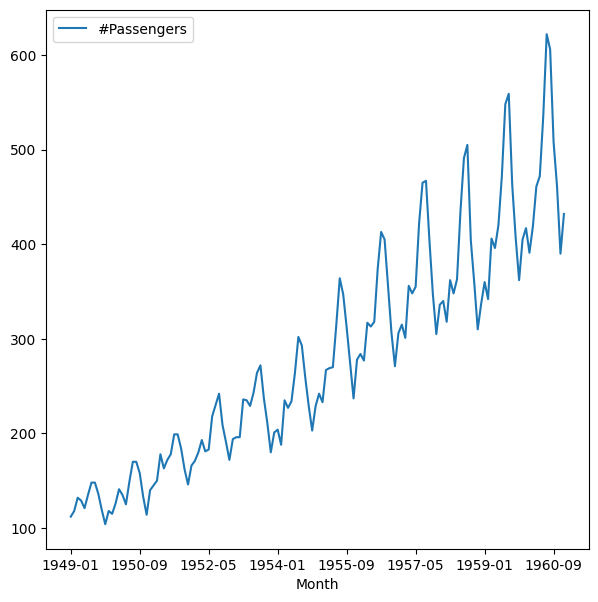

In [80]:
cp = df.copy()

cp.index = cp.Month
cp.drop(['Month'], axis = 1)


cp.plot(figsize = (7, 7))
plt.show()

you can notice that our data is seasonal but we don't need to worry about that as the fbprophet can handle the seasonality by itself.

In [81]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [113]:
fb = Prophet(interval_width=0.95) #cresting an instance of Prophet



# 'Prophet' always takes a dataframe with only 2 columns :
    # - 'ds' -> specifies the date
    # - 'y'-> specifies the values

# renaming our dataframe
df.columns = ['ds', 'y']

# fitting the data to the model
fb.fit(df)

# forcasting the values
# NOTE : the 'Prophet' model requires a dataframe with 'ds' column to be passed to forecast values. the 'ds' column should consist of dates in the same format as the dates passed while training the model.
future_dates = fb.make_future_dataframe(periods=36, freq = 'MS') #Prophet.make_future_dataframe() helps us to create future dates. 'periods' attribute specifies number of dates we want to create. this funciton will return a dataframe where there will be old dates from the dateset we trained the model with and then it will add 'n' number of dates where 'n' is specified in the 'periods' attribute.

# forecasting/predicting the values
forecast = fb.predict(future_dates)


20:47:59 - cmdstanpy - INFO - Chain [1] start processing
20:47:59 - cmdstanpy - INFO - Chain [1] done processing


In [97]:
future_dates

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [99]:
forecast[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail()
# here:
#   ds -> dates
#   yhat -> forecasted values
#   yhat_lower -> lower bound of the prediction
#   yhat_upper -> upper bound of the prediction

,ds,yhat_lower,yhat,yhat_upper
175,1963-08-01,606.087757,649.848630,696.040998
176,1963-09-01,557.704770,602.344925,648.410554
177,1963-10-01,523.752999,566.285229,610.099403
178,1963-11-01,491.277625,534.334833,578.423370
179,1963-12-01,519.561631,563.989108,611.374769


In [125]:
len(cp_

90

In [150]:
# plotting the predictions
cp_original = df.copy()
cp_original.index = cp_original['ds']
cp_original.drop(['ds'], axis = 1, inplace = True)

cp_pred = forecast.copy()
cp_pred.ds = pd.to_datetime(cp_pred.ds).dt.strftime('%Y-%m')
cp_pred.index = cp_pred['ds']
cp_pred.drop(['ds'], axis = 1, inplace = True)



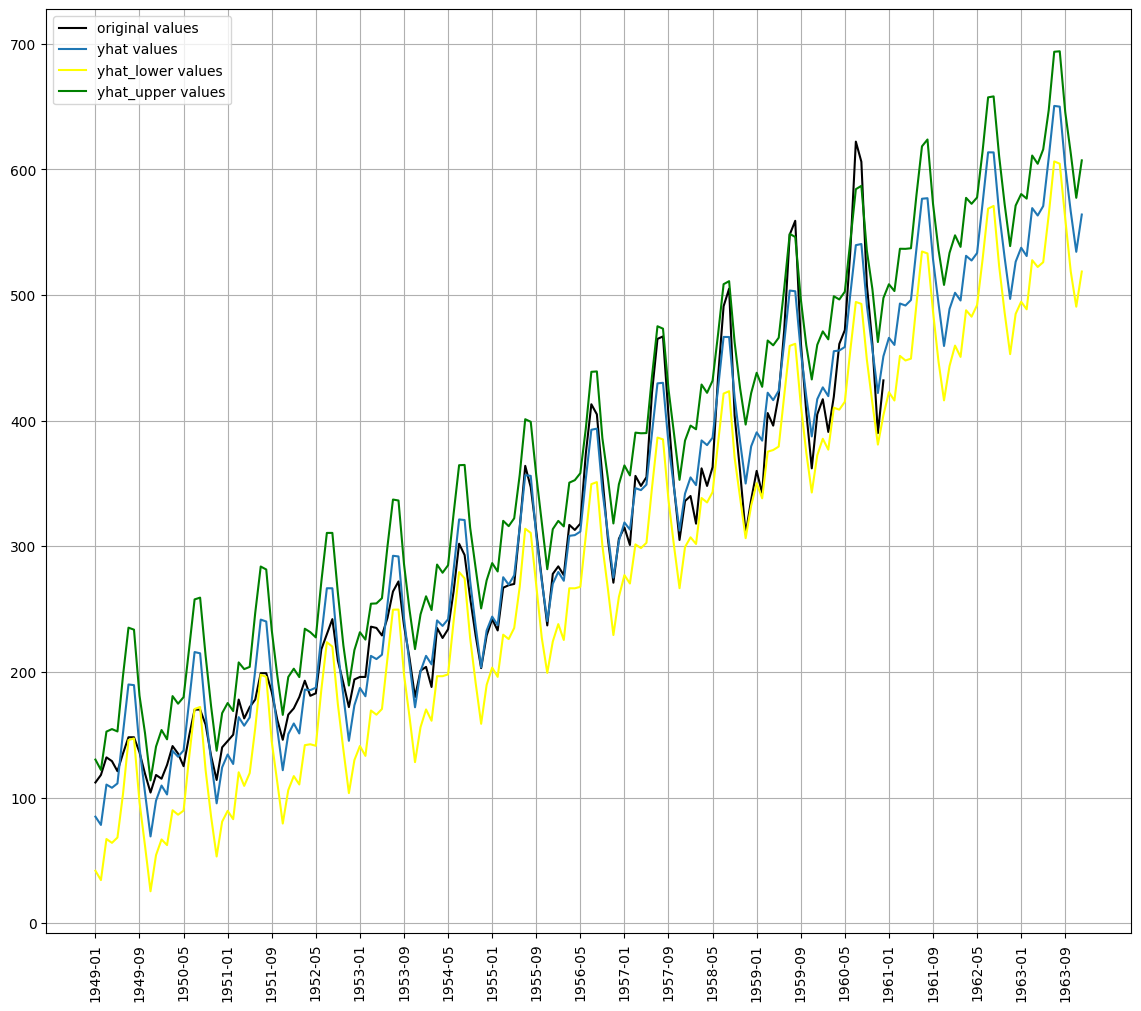

In [152]:

plt.subplots(figsize = (14, 12))

plt.plot(cp_original.y, color = 'black', label = 'original values')
plt.plot(cp_pred.yhat, label = 'yhat values')
plt.plot(cp_pred.yhat_lower, color = 'yellow', label = 'yhat_lower values')
plt.plot(cp_pred.yhat_upper, color = 'green', label = 'yhat_upper values')

plt.xticks(cp_pred.index[::8], rotation = 90)
plt.grid()
plt.legend()

plt.show()

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


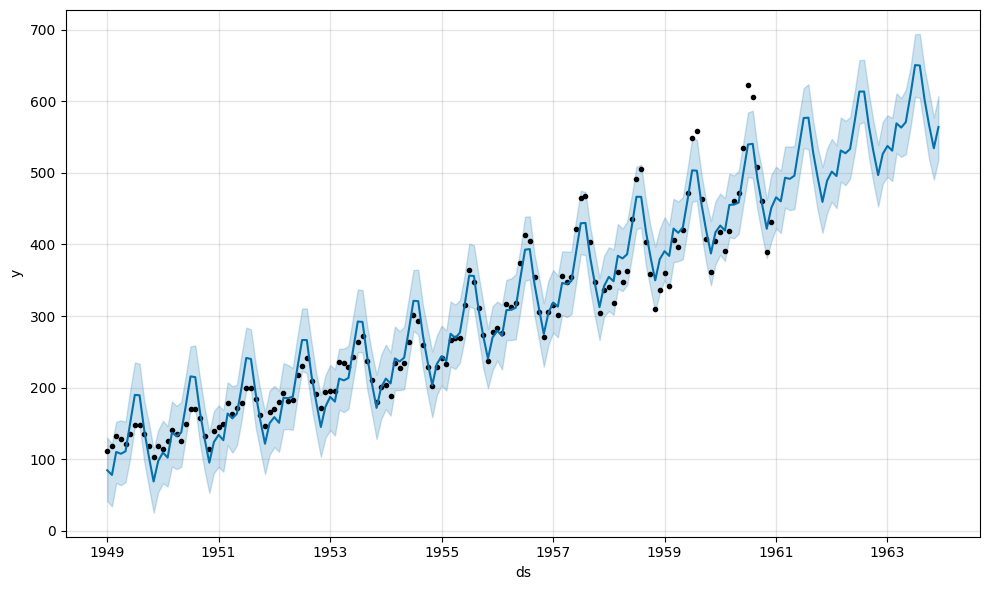

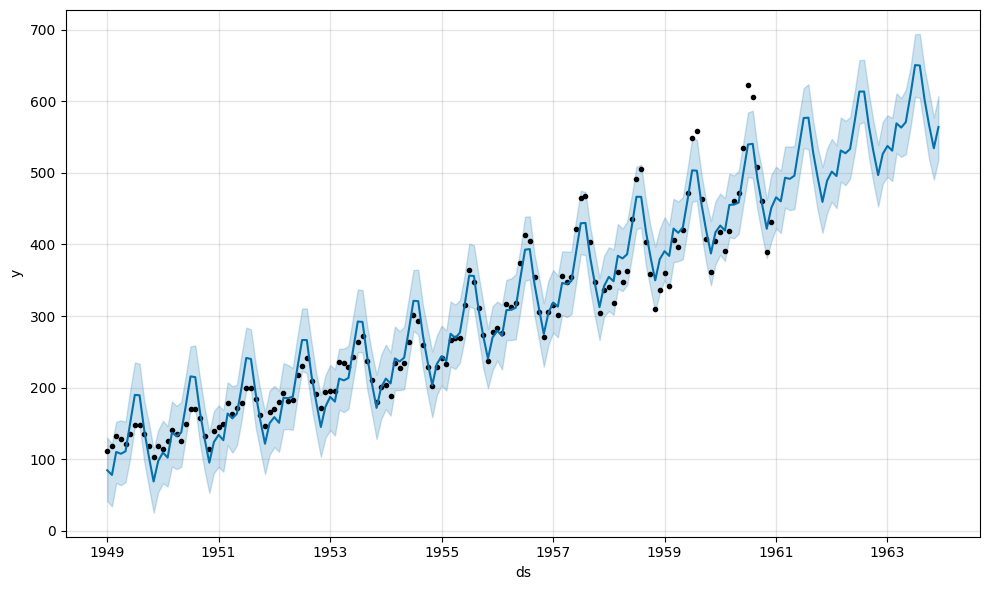

In [145]:
# Prophet also has its own plotting functions

fb.plot(forecast)